$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

Finite difference method for the wave equation. This notebook is adapted from [Prof Barba](http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/).

$$\pad{u}{t}+c\pad{u}{x}=0$$

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                 #here we load numpy, calling it 'np' from now on
import matplotlib.pyplot as plt    #here we load matplotlib, calling it 'plt'
import time, sys                   #and load some utilities

#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline    

In [2]:
nx = 51  # try changing this number from 51 to 81 and Run All ... what happens?
dx = 2./(nx-1)
nt = 250    #nt is the number of timesteps we want to calculate
dt = .0025  #dt is the amount of time each timestep covers (delta t)
c = 1.      #assume wavespeed of c = 1

In [3]:
u = np.ones(nx)      #numpy function ones()
u[int(.5/dx): int(1/dx+1)]=-1  #setting u = 2 between 0.5 and 1 as per our I.C.s
print u

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


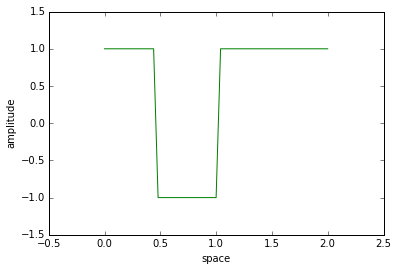

In [4]:
plt.plot(np.linspace(0,2,nx), u,'g')
plt.xlim(-.5,2.5),plt.ylim(-1.5,1.5) 
plt.xlabel("space"),plt.ylabel("amplitude");

In [5]:
un = np.ones(nx) #initialize a temporary array
ui = u.copy()
for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy()    #copy the existing values of u into un
    for i in range(1,nx): #starts the range with 1
        u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])

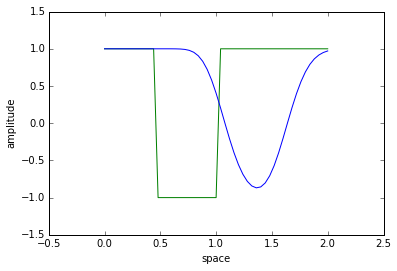

In [6]:
plt.plot(np.linspace(0,2,nx),ui,'g')
plt.plot(np.linspace(0,2,nx),u)
plt.xlim(-.5,2.5),plt.ylim(-1.5,1.5)
plt.xlabel("space"),plt.ylabel("amplitude");